<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/resnet34%20Train%2BInference%20(ImageNet%20statistics%2C%20pretrained%2C%20full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Oct  7 12:50:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -uq "/content/drive/MyDrive/DACON_2021_recognize_traffic_signal_motion/new_open.zip" -d "/content/"

In [4]:
!cp /content/drive/MyDrive/pytorch_python/dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_augmentation.py .
!cp /content/drive/MyDrive/pytorch_python/specific_dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_train.py .
!cp /content/drive/MyDrive/pytorch_python/train.py .

In [5]:
from dataset import *
from train import *

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import torch, torchvision
import torchvision.transforms as transforms

In [6]:
batch_size = 32

train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [7]:
train_dataset = TrainDataset(transform=train_transform)
val_dataset = ValDataset(transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [8]:
model = Baseline(model='resnet34', num_classes=len(train_dataset.label_info), print_freq=5, save=True)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [9]:
len(train_dataset.label_info)

157

In [10]:
epochs = 5
lr = 0.0005
weight_decay = 0.00001

In [11]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 5.263317, Test Loss : 5.139393, Train Acc : 0.000000, Test Acc : 3.057065
Best Model Saved
Iteration : 6 - Train Loss : 4.701484, Test Loss : 4.984003, Train Acc : 25.000000, Test Acc : 7.676630
Best Model Saved
Iteration : 11 - Train Loss : 4.857776, Test Loss : 4.985889, Train Acc : 3.125000, Test Acc : 7.948370
Best Model Saved
Iteration : 16 - Train Loss : 4.324750, Test Loss : 4.494110, Train Acc : 12.500000, Test Acc : 12.703804
Best Model Saved
Iteration : 21 - Train Loss : 4.099883, Test Loss : 3.843465, Train Acc : 25.000000, Test Acc : 23.573370
Best Model Saved
Iteration : 26 - Train Loss : 3.737545, Test Loss : 3.438897, Train Acc : 34.375000, Test Acc : 29.823370
Best Model Saved
Iteration : 31 - Train Loss : 2.821028, Test Loss : 2.919857, Train Acc : 56.250000, Test Acc : 34.986413
Best Model Saved
Iteration : 36 - Train Loss : 2.782130, Test Loss : 2.671008, Train Acc : 31.250000, Test Acc : 36.345109
Best

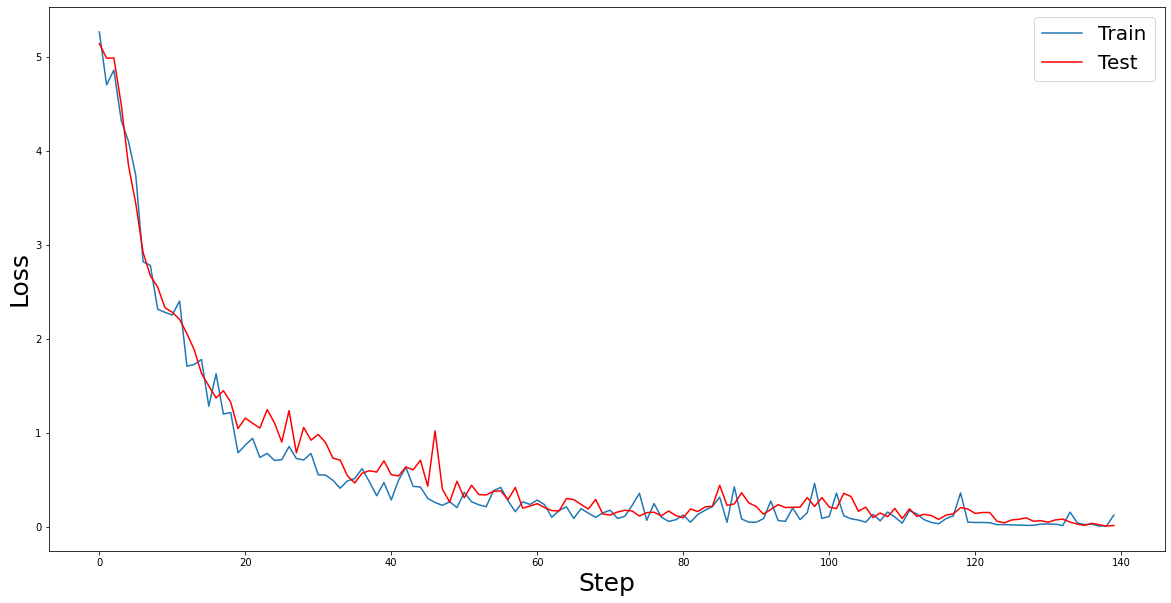

In [12]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

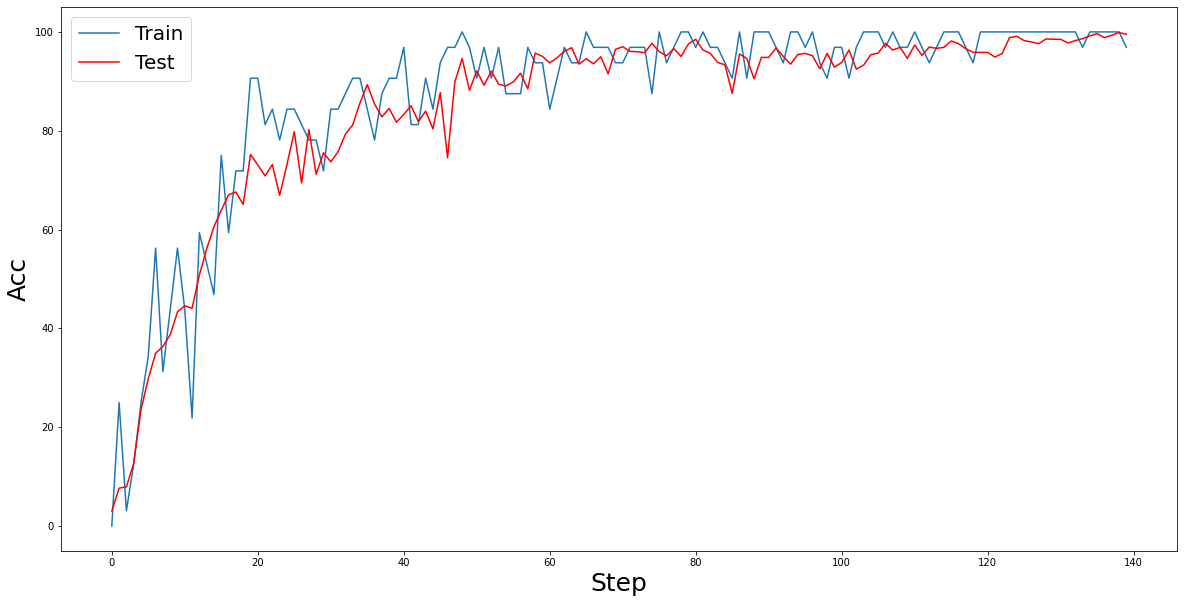

In [13]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()

In [14]:
import os, json, PIL
import pandas as pd

In [15]:
model = Baseline(model='resnet34', num_classes=157)
model.model.load_state_dict(torch.load('./4_130.pt'))
model.model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
test_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


data_dir = './test/'

predictions = []
with torch.no_grad():
    for num in sorted(os.listdir(data_dir)):
        with open(data_dir + '{}/{}.json'.format(num, num), 'r') as j:
            temp = json.load(j)
            imgs = []
            for info in temp['annotations']:
                img_dir = data_dir + '{}/{}.png'.format(num, info['image_id'])
                img = PIL.Image.open(img_dir).convert('RGB')
                img = test_transform(img)
                imgs.append(img)
            imgs = torch.stack(imgs).cuda()
            prediction = torch.nn.Softmax(dim=1)(model.model(imgs))
            prediction = torch.mean(prediction, dim=0)
            # print(prediction)
            #if torch.max(prediction) > 0.9:
            #    prediction[torch.argmax(prediction)] = 1
            #    prediction[prediction < 1] = 0
            
            if torch.sum(prediction) != 1: print(torch.sum(prediction))
            predictions.append(prediction.cpu().numpy())

tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1

In [20]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission.iloc[:,1:] = predictions
sample_submission.to_csv('./ImageNetStat_4_130_threshno.csv', index=False)

In [18]:
print(len(predictions))
print(len(predictions[0]))

217
157


In [19]:
sample_submission.iloc[:,1:]

,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14,Label_15,Label_16,Label_17,Label_18,Label_19,Label_22,Label_23,Label_25,Label_26,Label_27,Label_28,Label_29,Label_31,Label_32,Label_34,Label_35,Label_36,Label_37,Label_39,Label_40,Label_41,Label_42,Label_43,Label_44,Label_47,...,Label_142,Label_143,Label_144,Label_145,Label_146,Label_147,Label_148,Label_149,Label_150,Label_151,Label_153,Label_154,Label_155,Label_156,Label_157,Label_158,Label_159,Label_160,Label_161,Label_162,Label_163,Label_165,Label_167,Label_168,Label_169,Label_171,Label_172,Label_173,Label_174,Label_175,Label_177,Label_186,Label_188,Label_189,Label_190,Label_191,Label_192,Label_193,Label_194,Label_195
0,1.366461e-01,7.237936e-04,9.827369e-05,2.360218e-04,2.691388e-04,3.738632e-03,8.263561e-01,2.925656e-04,2.008744e-05,7.135373e-05,7.772438e-04,2.903113e-04,8.687957e-05,8.403351e-05,4.074245e-05,1.082751e-05,2.800827e-04,2.540727e-04,2.746585e-05,2.748135e-05,6.741194e-04,3.843603e-03,6.426987e-04,3.180372e-04,1.108908e-03,3.161690e-03,9.428516e-05,9.328066e-05,1.260265e-04,2.369415e-05,4.137167e-03,1.858832e-04,4.764261e-05,3.722369e-05,1.593929e-04,8.811253e-05,1.476078e-04,5.912943e-05,2.840392e-05,1.175761e-04,...,2.910359e-04,8.334991e-05,2.866819e-06,4.789520e-05,1.464838e-05,2.283856e-04,5.317477e-05,2.895694e-04,2.771706e-04,2.985929e-05,1.437326e-05,1.566546e-04,3.491242e-05,1.961056e-05,3.205837e-05,1.396562e-04,1.231081e-05,1.001821e-04,2.313179e-05,2.360649e-05,3.845831e-04,4.075524e-05,3.800144e-05,1.070356e-05,1.935359e-05,2.470387e-05,1.165185e-05,1.678316e-05,6.546092e-05,4.248520e-05,8.376370e-06,3.609366e-05,7.595451e-06,2.378702e-05,6.572739e-06,4.030398e-04,5.536678e-05,1.050145e-05,3.946944e-05,1.999894e-05
1,3.031993e-04,8.828874e-06,1.614730e-06,3.089399e-06,3.731080e-06,2.037974e-06,8.523562e-05,9.258734e-06,1.458130e-06,3.299993e-06,9.920049e-01,3.683095e-04,1.498454e-05,5.391383e-05,1.874139e-06,6.165548e-06,1.116563e-03,6.992801e-06,6.244269e-07,5.285571e-07,3.352445e-05,5.033430e-05,9.627252e-06,1.191596e-06,7.991006e-06,9.898224e-05,2.179944e-05,7.931734e-06,1.488064e-05,1.185028e-06,3.527440e-06,6.758693e-06,1.417284e-06,2.294502e-06,5.042484e-06,1.335367e-05,4.082804e-03,1.086619e-05,4.655561e-06,5.477448e-05,...,8.628095e-06,6.352295e-07,8.207378e-08,1.286088e-06,2.930067e-07,6.348615e-06,1.486306e-05,1.972422e-05,5.341220e-06,2.121504e-06,2.026188e-06,1.215538e-06,4.965277e-06,8.632699e-07,1.197919e-06,1.518728e-06,9.518706e-07,3.195592e-06,6.117203e-06,4.933517e-07,4.236320e-06,1.071804e-06,2.483979e-04,9.588259e-08,6.379271e-07,2.784213e-06,2.325178e-06,1.829331e-06,1.140057e-05,2.927185e-06,9.250539e-07,5.589079e-07,5.180854e-07,1.041371e-06,1.772139e-07,5.269188e-06,1.236342e-06,1.235379e-06,8.671632e-06,4.664869e-07
2,1.104366e-04,1.663295e-03,4.098665e-04,8.414817e-05,3.422107e-05,2.129812e-05,6.955329e-05,3.669668e-04,8.459223e-05,1.285453e-04,7.313588e-03,9.001295e-01,6.552939e-02,9.347708e-04,3.221144e-05,3.826735e-04,1.013374e-04,6.919280e-03,1.561331e-04,9.789162e-05,1.591386e-04,6.597351e-05,8.717048e-05,3.035954e-05,9.753685e-05,2.924016e-04,3.683779e-05,2.822432e-05,8.580639e-05,3.201668e-05,2.017622e-04,5.594813e-05,3.438624e-05,1.701938e-04,6.448830e-04,2.966667e-04,1.587809e-04,1.744641e-05,2.106667e-05,9.083340e-04,...,4.059674e-05,1.315698e-05,7.963029e-06,3.070183e-06,9.589890e-06,1.029429e-05,4.091690e-05,2.523626e-05,1.858219e-05,2.042729e-05,6.185545e-06,6.502404e-06,4.244626e-06,5.513857e-06,1.527939e-05,1.682549e-05,3.891841e-06,2.364745e-05,6.782319e-06,1.406576e-06,1.028676e-05,1.511744e-05,5.344403e-05,1.752677e-06,9.192847e-06,9.883688e-05,3.254888e-05,1.739843e-05,4.791595e-05,5.615701e-05,1.287929e-04,1.036412e-05,1.775550e-05,1.282681e-05,1.372444e-05,3.511968e-05,6.038018e-06,7.115435e-06,3.090917e-05,4.972014e-05
3,1.028770e-05,2.354617e-04,2.866553e-05,5.928264e-06,3.783399e-06,1.616181e-06,1.088530e-05,1.319078e-04,1